In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yahoo-finance-tesla/TSLA.csv
/kaggle/input/aapllll/AAPL.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('/kaggle/input/aapllll/AAPL.csv')
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


trending startwith 5-2015 and endwith 5-2020

In [5]:
data.shape

(1258, 15)

In [6]:
df = data.reset_index()['close']

In [7]:
df.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

<AxesSubplot:ylabel='close'>

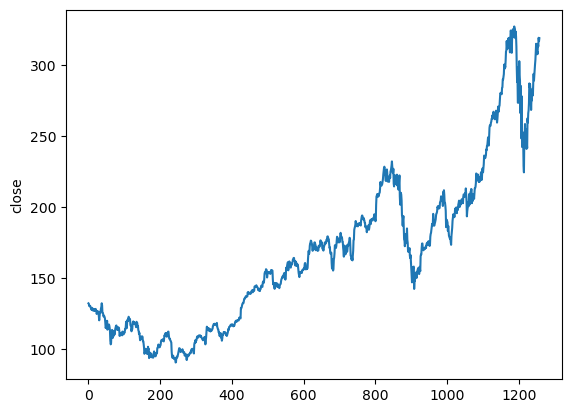

In [8]:
#visualizing the clse features--
sns.lineplot(df)

In [9]:
# converting these data into scalar
scalar = MinMaxScaler(feature_range=(0,1))
df = scalar.fit_transform(np.array(df).reshape(-1,1))

In [10]:
print(df)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [11]:
#spliting data for train and test purpose---
train = int(len(df)*0.65)
test = len(df)-train
train_data = df[:train,:]
test_data = df[train:,:]

In [12]:
print(len(train_data),len(test_data))

817 441


In [13]:
# converting these array value into dataset_metrix

def create_dataset(dataset,timestamp=1):
    train_x,train_y=[],[]
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp),0]
        train_x.append(a)
        train_y.append(dataset[i+timestamp,0])
    return np.array(train_x),np.array(train_y)

In [14]:
timestamp = 100
x_train,y_train = create_dataset(train_data,timestamp)
x_test,y_test = create_dataset(test_data,timestamp)

In [15]:
print(x_train.shape,y_train.shape)

(716, 100) (716,)


In [16]:
print(x_test.shape,y_test.shape)

(340, 100) (340,)


In [17]:
# input are re shape int 3 dimensional because lstm require---

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [18]:
x_train.shape

(716, 100, 1)

In [19]:
x_test.shape

(340, 100, 1)

In [20]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential


In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 222ms/step - loss: 0.0254 - val_loss: 0.0509
Epoch 2/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 4/100
12/12 [==============================] - 2s 136ms/step - loss: 7.8403e-04 - val_loss: 0.0063
Epoch 5/100
12/12 [==============================] - 2s 136ms/step - loss: 6.7862e-04 - val_loss: 0.0060
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 6.8490e-04 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 6.7298e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 2s 136ms/step - loss: 6.6441e-04 - val_loss: 0.0044
Epoch 9/100
12/12 [==============================] - 2s 137ms/step - loss: 6.6343e-04 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 2s 144ms/step

In [24]:
# check model performance-
train_predict = model.predict(x_train)
test_predict =model.predict(x_test)

11/11 [==============================] - 0s 30ms/step


In [25]:
# feature tainsform in origional form
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [26]:
from sklearn import metrics
import math
print("error_in training",math.sqrt(metrics.mean_squared_error(y_train,train_predict)))
print("error in testing",math.sqrt(metrics.mean_squared_error(y_test,test_predict)))
      

error_in training 142.94261995185445
error in testing 239.79826420808146


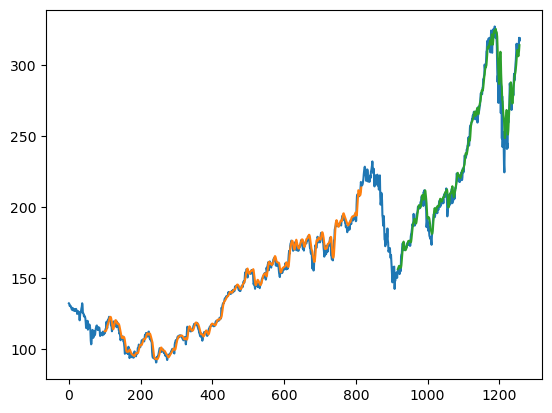

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [32]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95991135]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

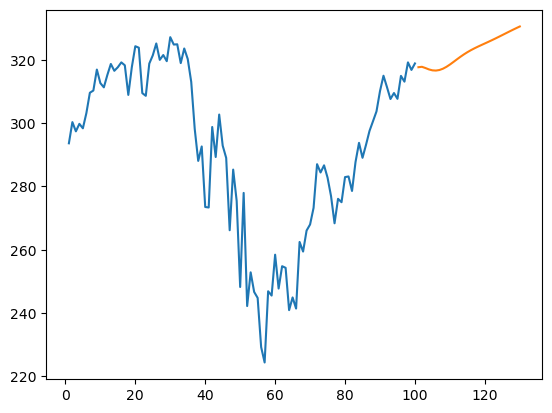

In [34]:
plt.plot(day_new,scalar.inverse_transform(df[1158:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

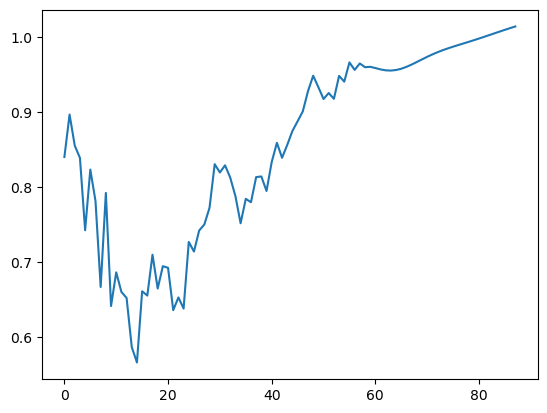

In [35]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [36]:
df3=scalar.inverse_transform(df3).tolist()

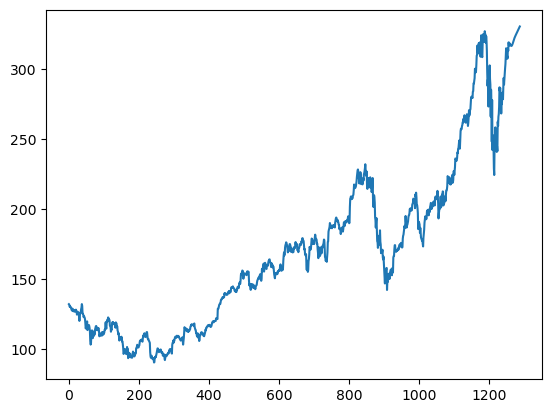

In [37]:
plt.plot(df3)